In [41]:
import numpy as np
from numpy.random import randint
from matplotlib import cm, pyplot as plt
from imageio import imread, imsave
from numpy.random import randint

plt.rcParams['figure.figsize'] = (16,10)

# Problem 1

Complete the following function, by implementing the anisotropic diusion algorithm found in 10.1 for black and white images.
Run the function on balloon.jpg. Show the original image and the diused image for σ = .1,
λ = .25, N = 5, 20, 100.

In [42]:
def anisdiff_bw(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    
    #set U to pad
    U = np.pad(U,1,mode='edge')
    
    #loop through to get the picture
    for n in range(N):
        U[1:-1, 1:-1] += lambda_*(g(np.abs(U[1:-1,:-2]) - U[1:-1,1:-1])*(U[1:-1,:-2] - U[1:-1,1:-1])
                                +g(np.abs(U[1:-1, 2:] - U[1:-1, 1:-1]))*(U[1:-1, 2:] - U[1:-1, 1:-1])
                                +g(np.abs(U[:-2, 1:-1] - U[1:-1, 1:-1]))*(U[:-2, 1:-1] - U[1:-1, 1:-1])
                                +g(np.abs(U[2:, 1:-1] - U[1:-1, 1:-1]))*(U[2:, 1:-1] - U[1:-1, 1:-1]))
    return U

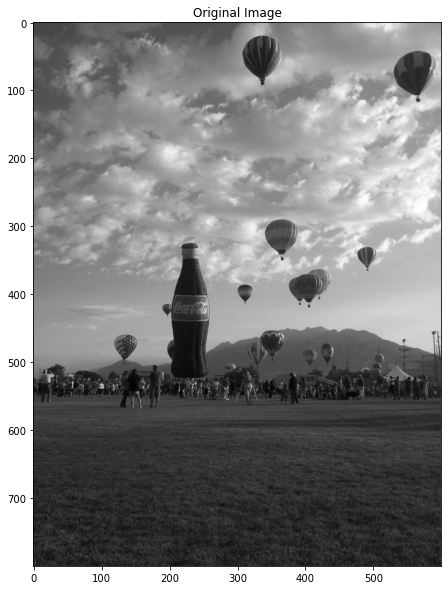

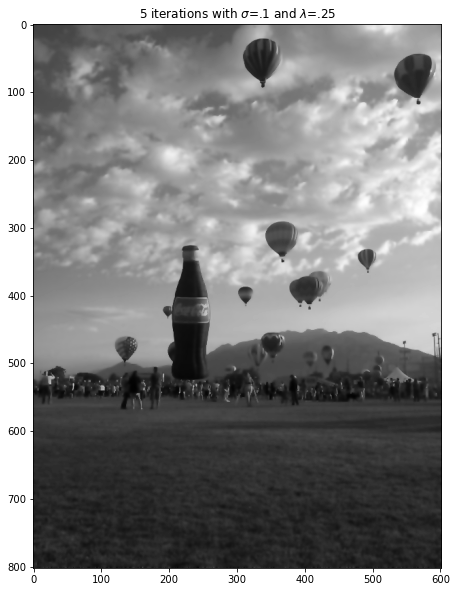

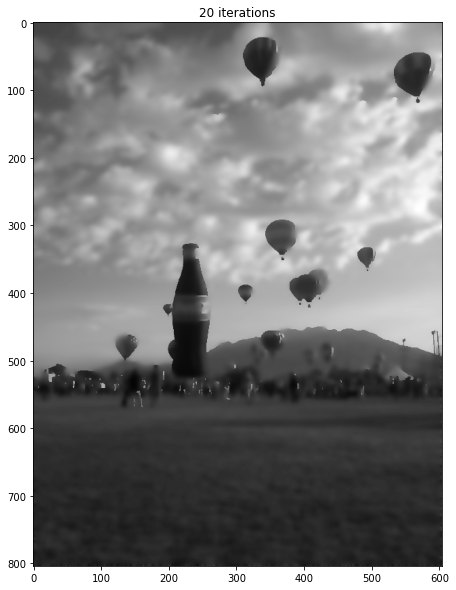

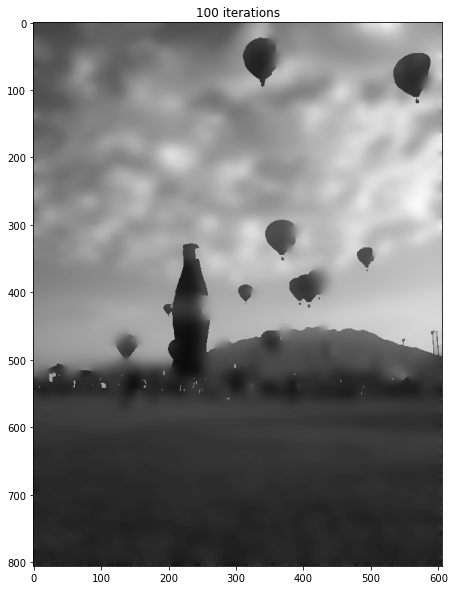

In [43]:
#set the variables
o = .1
g = lambda x: np.exp(-(x/o)**2)
lambda_ = .25

#The original picture
U = imread('balloon.jpg', as_gray=True) * 1./255
plt.imshow(U, cmap = cm.gray)
plt.title("Original Image")
plt.show()

#5 iterations
U = anisdiff_bw(U, 5, lambda_, g)
plt.imshow(U, cmap = cm.gray)
plt.title(r"5 iterations with $\sigma$=.1 and $\lambda$=.25")
plt.show()

#20 iterations
U = anisdiff_bw(U, 20, lambda_, g)
plt.imshow(U, cmap = cm.gray)
plt.title("20 iterations")
plt.show()

#100 iterations
U = anisdiff_bw(U, 100, lambda_, g)
plt.imshow(U, cmap = cm.gray)
plt.title("100 iterations")
plt.show()

# Problem 2

Complete the following function to process a colored image.
Run the function on balloons_color.jpg. Show the original image and the diused image for
σ = .1, λ = .25, N = 5, 20, 100.

In [44]:
def anisdiff_color(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g = e^{-x^2/sigma^2}
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    
    #set U to pad
    U = np.pad(U,1,mode='edge')
    
    #loop through to get the picture
    for n in range(N):
        x1 = np.sqrt(np.sum((U[1:-1, :-2] - U[1:-1, 1:-1])**2, axis=2, keepdims=True))
        x2 = np.sqrt(np.sum((U[1:-1, 2:] - U[1:-1, 1:-1])**2, axis=2, keepdims=True))
        x3 = np.sqrt(np.sum((U[:-2,1:-1] - U[1:-1, 1:-1])**2, axis=2, keepdims=True))
        x4 = np.sqrt(np.sum((U[2:,1:-1] - U[1:-1, 1:-1])**2, axis=2, keepdims=True))
        
        U[1:-1,1:-1] += lambda_*(g(x1)*(U[1:-1,:-2] - U[1:-1,1:-1])
                                +g(x2)*(U[1:-1,2:] - U[1:-1,1:-1])
                                +g(x3)*(U[:-2,1:-1] - U[1:-1,1:-1])
                                +g(x4)*(U[2:,1:-1] - U[1:-1,1:-1]))
        
    return U[1:-1,1:-1,1:-1]

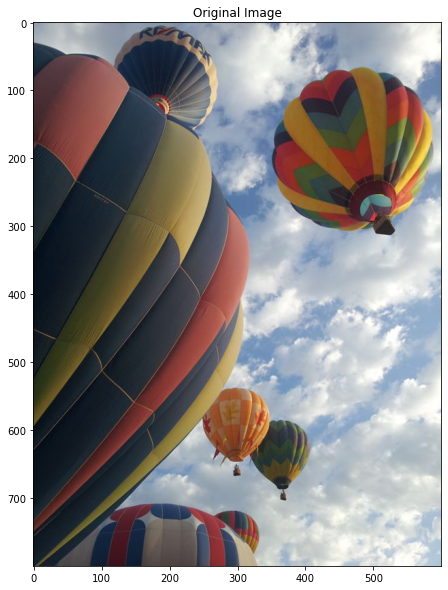

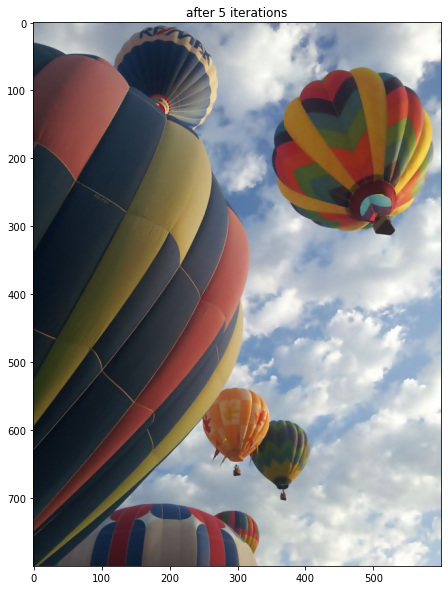

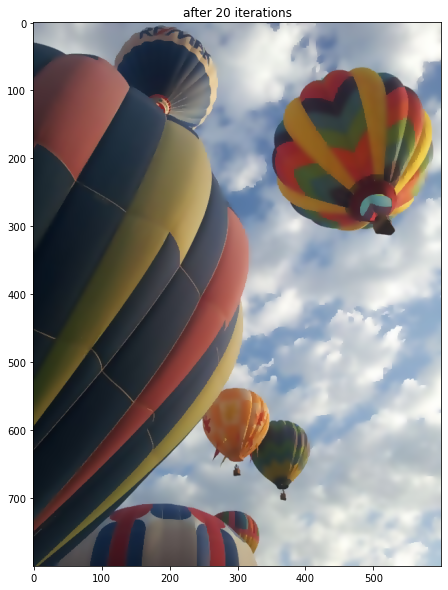

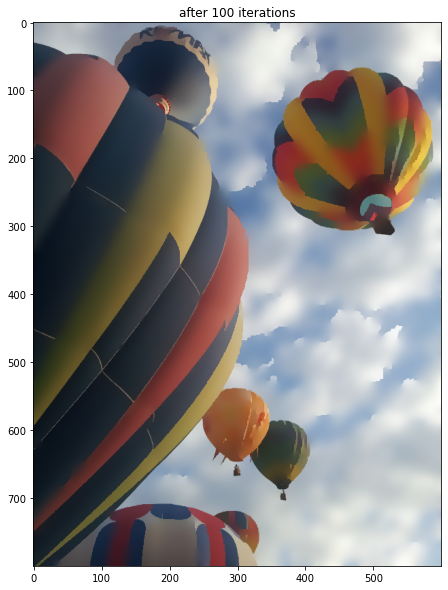

In [45]:
sigma = .1
lambda_ = .25
g = lambda x: np.exp(-((x/sigma)**2))

#The original image
U = imread("balloons_color.jpg") * 1./255
plt.imshow(U)
plt.title("Original Image")
plt.show()

#5 iterations
U = anisdiff_color(U, 5, lambda_, g)
plt.imshow(U)
plt.title("after 5 iterations")
plt.show()

#20 iterations
U = anisdiff_color(U, 20, lambda_, g)
plt.imshow(U)
plt.title("after 20 iterations")
plt.show()

#100 iterations
U = anisdiff_color(U, 100, lambda_, g)
plt.imshow(U)
plt.title("after 100 iterations")
plt.show()

# Problem 3

Run anisdiff_bw() on the noisy image with σ = .1, λ = .25, N = 20. Display the
original image and the noisy image. Explain why anisotropic diusion does not smooth out the
noise.

Use the following code to add noise to your grayscale image.

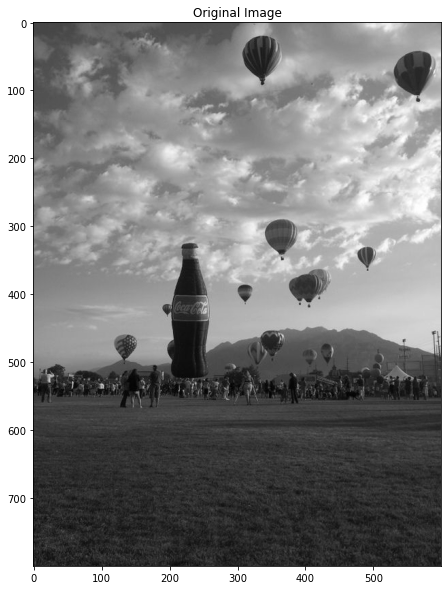

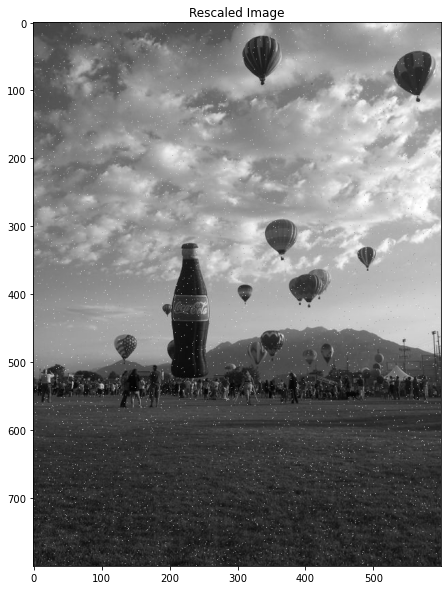

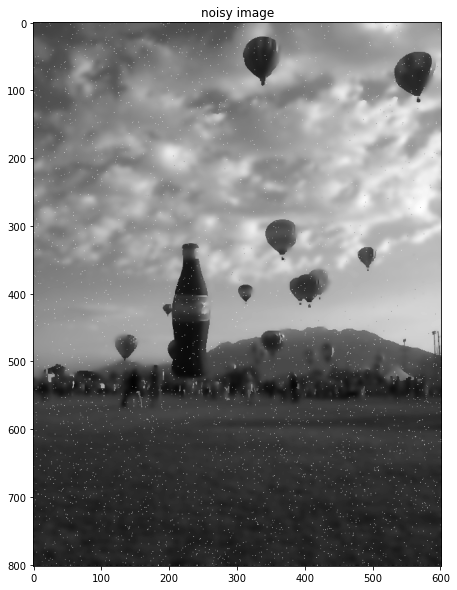

In [46]:
#The given code
image = imread('balloon.jpg', as_gray=True)
plt.imshow(image, cmap=cm.gray)
plt.title("Original Image")
plt.show()
x, y = image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)] = 127 + randint(127)

#Rescale the image
image /= 255 
plt.imshow(image, cmap = cm.gray)
plt.title("Rescaled Image")
plt.show()

#set the variables
sigma = .1
lambda_ = .25
N = 20
g = lambda x: np.exp(-((x/sigma)**2))

#Run anisdiff_bw() on the noisy variables
image = anisdiff_bw(image, N, lambda_, g)

#plot them
plt.imshow(image, cmap=cm.gray)
plt.title("noisy image")
plt.show()

The image has white dots which is considered as boundaries.
And the anisotropic diffusion stop smoothing at the boundaries.

# Problem 4

Implement the minimum-biased finite diverence scheme described above. Add noise to
balloons_color.jpg using the provided code below, and clean it using your implementation.
Show the original image, the noised image, and the cleaned image.

In [47]:
image = imread('balloons_color.jpg')
x,y,z = image.shape
for dim in range(z):
    for i in range(x*y//100):
        # Assign a random value to a random place
        image[randint(x),randint(y),dim] = 127 + randint(127)
